#**Project Title:-Cardiovascular Risk Prediction**

###**What is mean by cardiovascular risk?**
It is Heart and blood vessel disease (also called heart disease) includes numerous problems, many of which are related to a process called atherosclerosis

Atherosclerosis is a condition that develops when a substance called plaque builds up in the walls of the arteries. This buildup narrows the arteries, making it harder for blood to flow through. If a blood clot forms, it can block the blood flow. This can cause a heart attack or stroke.

###**Key facts regarding cardiovascular risk by WHO servey**
Cardiovascular diseases are the leading cause of death globally.

An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.

Over three quarters of CVD deaths take place in low- and middle-income countries.

Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.

It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.

###**Reason behind the project :-**
As Cardiovascular disease is a significant and ever-growing problem in all over nations. It pressing interest as developing countries experience a change in lifestyle which introduces novel risk factors for cardiovascular disease. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk

In [149]:
#importing required labraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

###**Data Collection**

In [150]:
# loading the csv data to a Pandas DataFrame
df=pd.read_csv("/content/drive/MyDrive/Cardiovascular-Risk-Prediction-main/data_cardiovascular_risk.csv")


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk offuture coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [151]:
# print first 5 rows of the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Variables :

*   Demographic

1.   sex:- male or female
2.   age:- age of the patient

* Behavioural

1.   Is_smoking( do person smoke currently)
2.   cigsPerDay( number of cigarretts person prefers, even half a cigarette)

*   Medical( history)


1.   BPMeds: whether or not the patient was on blood pressure medication
2.   prevalentStroke: whether or not the patient had previously had a stroke
1.   prevalentHyp: whether or not the patient was hypertensive
2.   diabetes: whether or not the patient had diabetes

*   Medical(current)

1.   totChol: total cholesterol level
1.  sysBP: systolic blood pressure
2.   diaBP: diastolic blood pressure
2.   BMI: Body Mass Index
1.   heartRate: heart rate
2.   glucose: glucose level

*   Predict variable

1.  10 year risk of coronary heart disease TenYearCHD ( 1 means 'Yes', 0 means 'NO')















In [152]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [153]:
# statistical measures about the data
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## **Exploratory Analysis**

---









### **Analysis of Dependent Variable:-**

<b> What is a dependent variable in data analysis?</b>

* we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.


In [154]:
# counting the TenYearCHD variable data set
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

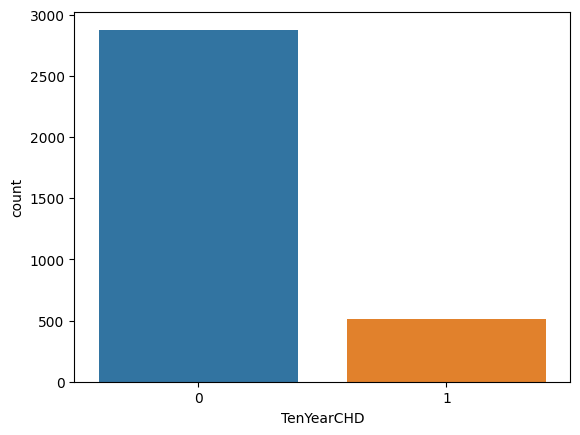

In [155]:
# checking the count distribution of TenYearCHD Variable
sns.countplot(x ='TenYearCHD', data = df)

From the above bar graph we can say that

0 - for The Person who is not showing  cardiovascular risk

1 - for The Person who is showing  cardiovascular risk


<b>Persons showing risk are less than the Persons not showing risk  in the given dataset</b>.As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.

## **Analysis of Independent Variables:-**

### **Categorical Features :-**





In [156]:
def get_value_count_of_whole_dataset(dataframe):
  for i in dataframe:
    print(f"Value count of '{i}' column : \n{dataframe[i].value_counts()}")
    print('*'*80)
get_value_count_of_whole_dataset(df)

Value count of 'id' column : 
0       1
2277    1
2253    1
2254    1
2255    1
       ..
1133    1
1134    1
1135    1
1136    1
3389    1
Name: id, Length: 3390, dtype: int64
********************************************************************************
Value count of 'age' column : 
40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64
********************************************************************************
Value count of 'education' column : 
1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
********************************************************************************
Value count of 'sex'

from above analysis we see that we have few categorical features in our dataset that are


* age

* education

* sex

* is_smoking

* BPMeds

* prevalentStroke

* prevalentHyp

* diabetes

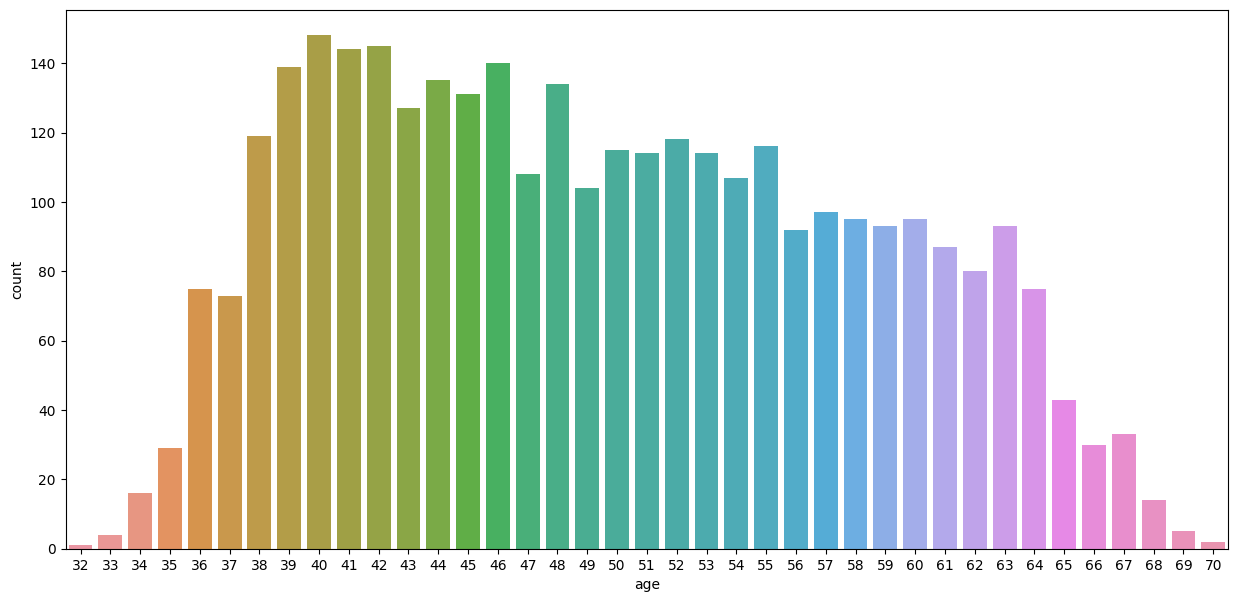

In [157]:
#plotting the count plot for age distribution
plt.figure(figsize=(15,7))
sns.countplot(x='age',data = df)
plt.show()

**From the above bar graph we can say that most of people belongs age 38-64**

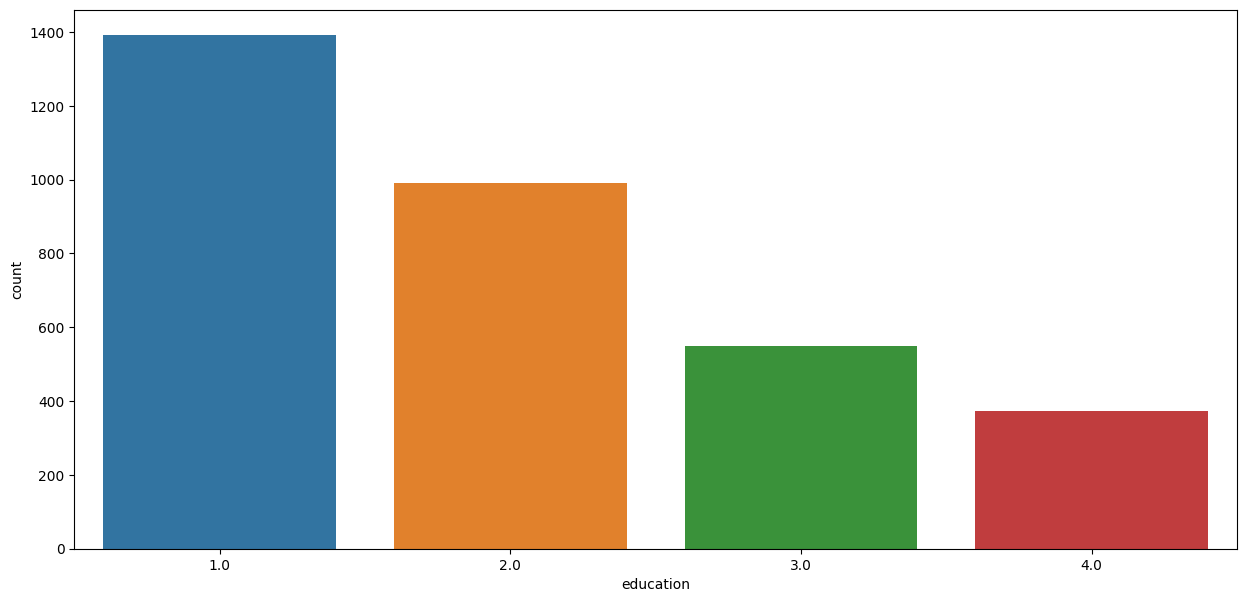

In [158]:
#plotting the count plot education
plt.figure(figsize=(15,7))
sns.countplot(x = 'education', data = df)
plt.show()

**From the above bar graph we can say that most of people have education of 1**

<Axes: xlabel='sex', ylabel='count'>

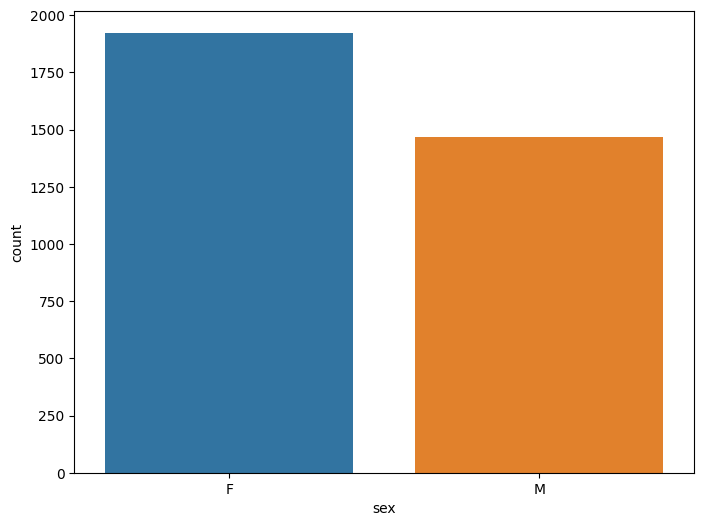

In [159]:
# ploating  the distribution of sex Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='sex', data = df)  

Graph consist of

* M-Male

* F-female

**Above graph shows number of females is more than number of male**

<Axes: xlabel='is_smoking', ylabel='count'>

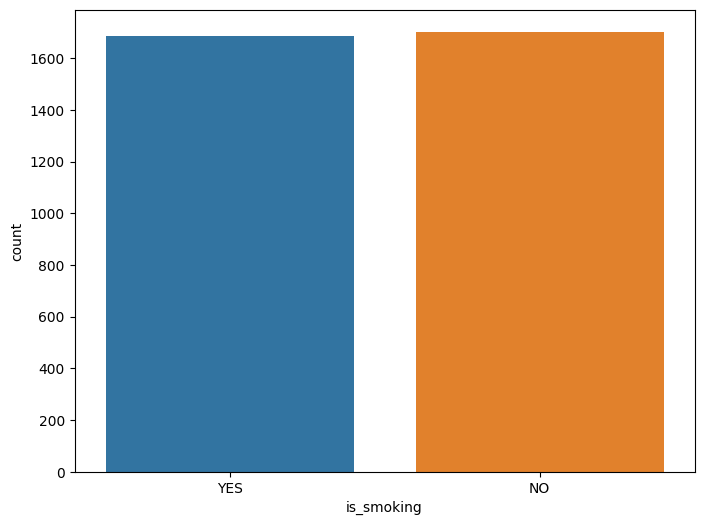

In [160]:
# checking the distribution of is_smoking Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='is_smoking', data = df)

Bar graph shows

* NO-For person who dont smoke

* YES-For person who smoke

**we can conclude that people prefers smoking and people avoide smokeing are appriximately same in dataset**

<Axes: xlabel='BPMeds', ylabel='count'>

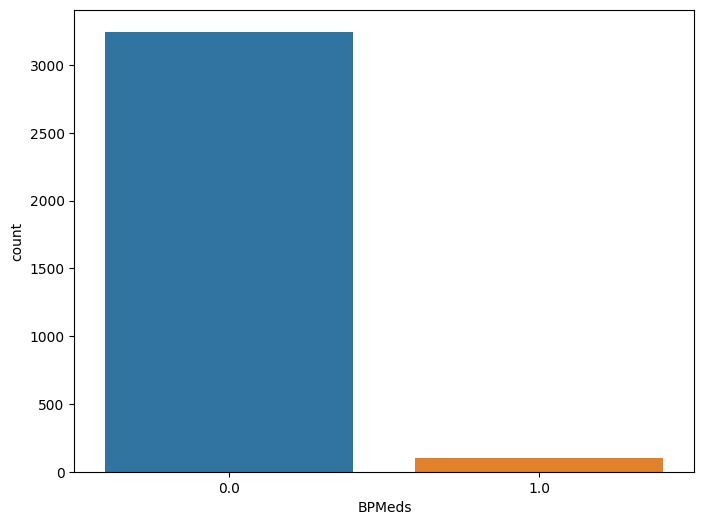

In [161]:
# checking the distribution of male & female Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='BPMeds', data = df)

Bar graph shows

* 0.0 - For person who doesnt takes BP medcine

* 1.0 - For person who takes BP medcine

**here we can see that there are only 88 persons who take BP medcine**

<Axes: xlabel='prevalentStroke', ylabel='count'>

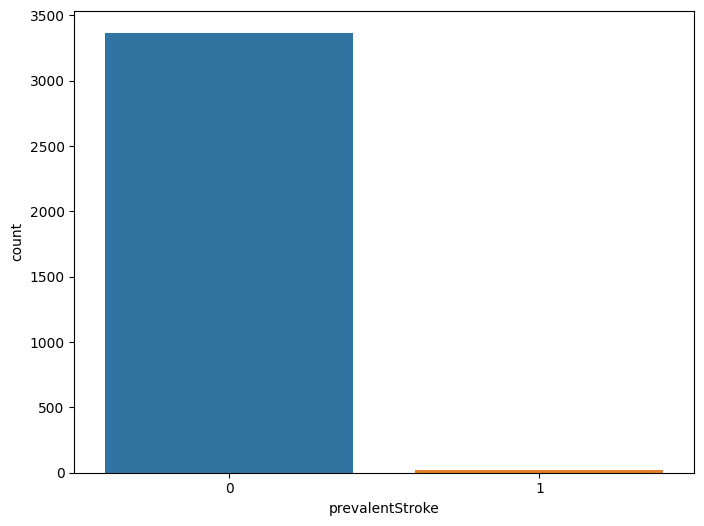

In [162]:
# checking the distribution of male & female Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='prevalentStroke', data = df)

Bar graph shows

* 0 - For person who is not patient of prevalentstoke

* 1 - For person who is patient of prevalentstoke

**here we can see that there are only 18 persons who are patients of prevalentstoke. which are few as compare to data we will drop column after EDA**

<Axes: xlabel='prevalentHyp', ylabel='count'>

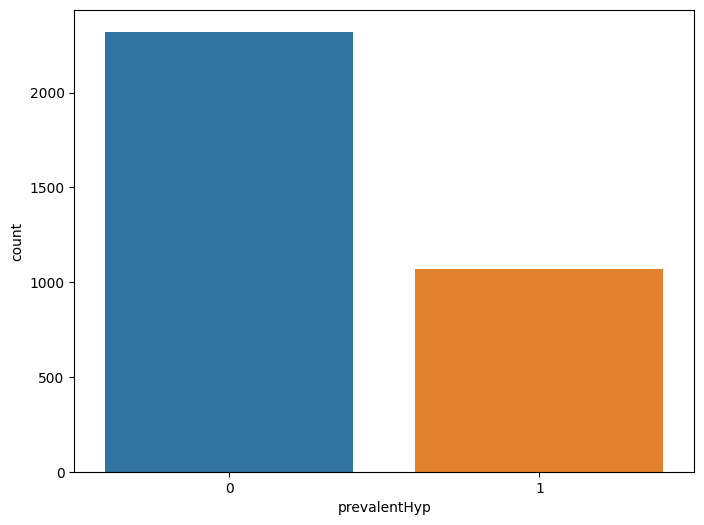

In [163]:
# checking the distribution of prevalentHyp Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='prevalentHyp', data = df)

Bar graph shows

* 0 - For person who is not patient of prevalentHyp

* 1 - For person who is patient of prevalentHyp

**we can see that persons who are patients of prevalentHyp are approx half of persons who are not patients of prevalentHyp**

<Axes: xlabel='diabetes', ylabel='count'>

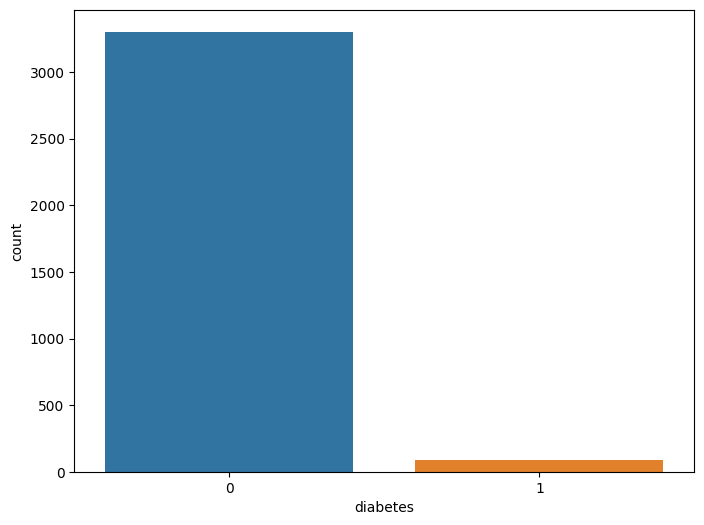

In [164]:
# checking the distribution of diabetes Variable
plt.figure(figsize=(8,6))
sns.countplot(x ='diabetes', data = df)

Bar graph shows

0 - For person who is not patient of diabetes

1 - For person who is patient of diabetes

**From the above bar plot we can conclude that very few people showing diabetes**

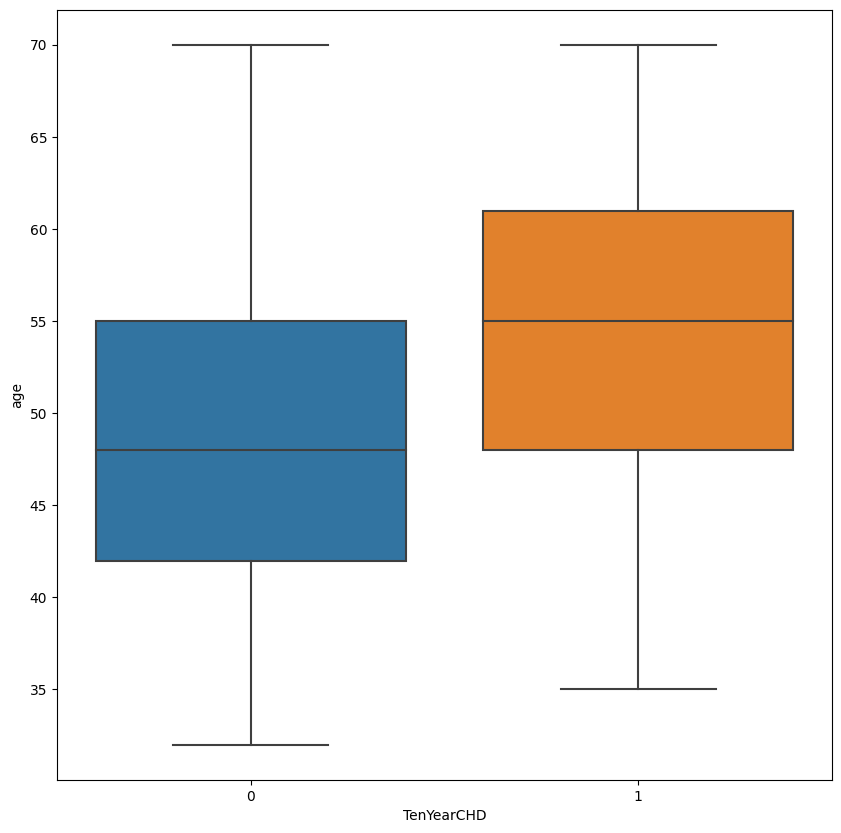

In [165]:
#plotting the box plot to vizualize the TenYearCHD distribution for age 
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="TenYearCHD", y="age", data=df)

**From the above box plot we can conclude that  most people showing cardiovasculat risk belongs age 48-62**

### **Numerical features**

---




We have few categorical features in our dataset that are

* cigsPerDay

* totChol	

* sysBP

* diaBP	
  
* BMI

* heartRate	
    
* glucose

<Axes: xlabel='cigsPerDay', ylabel='count'>

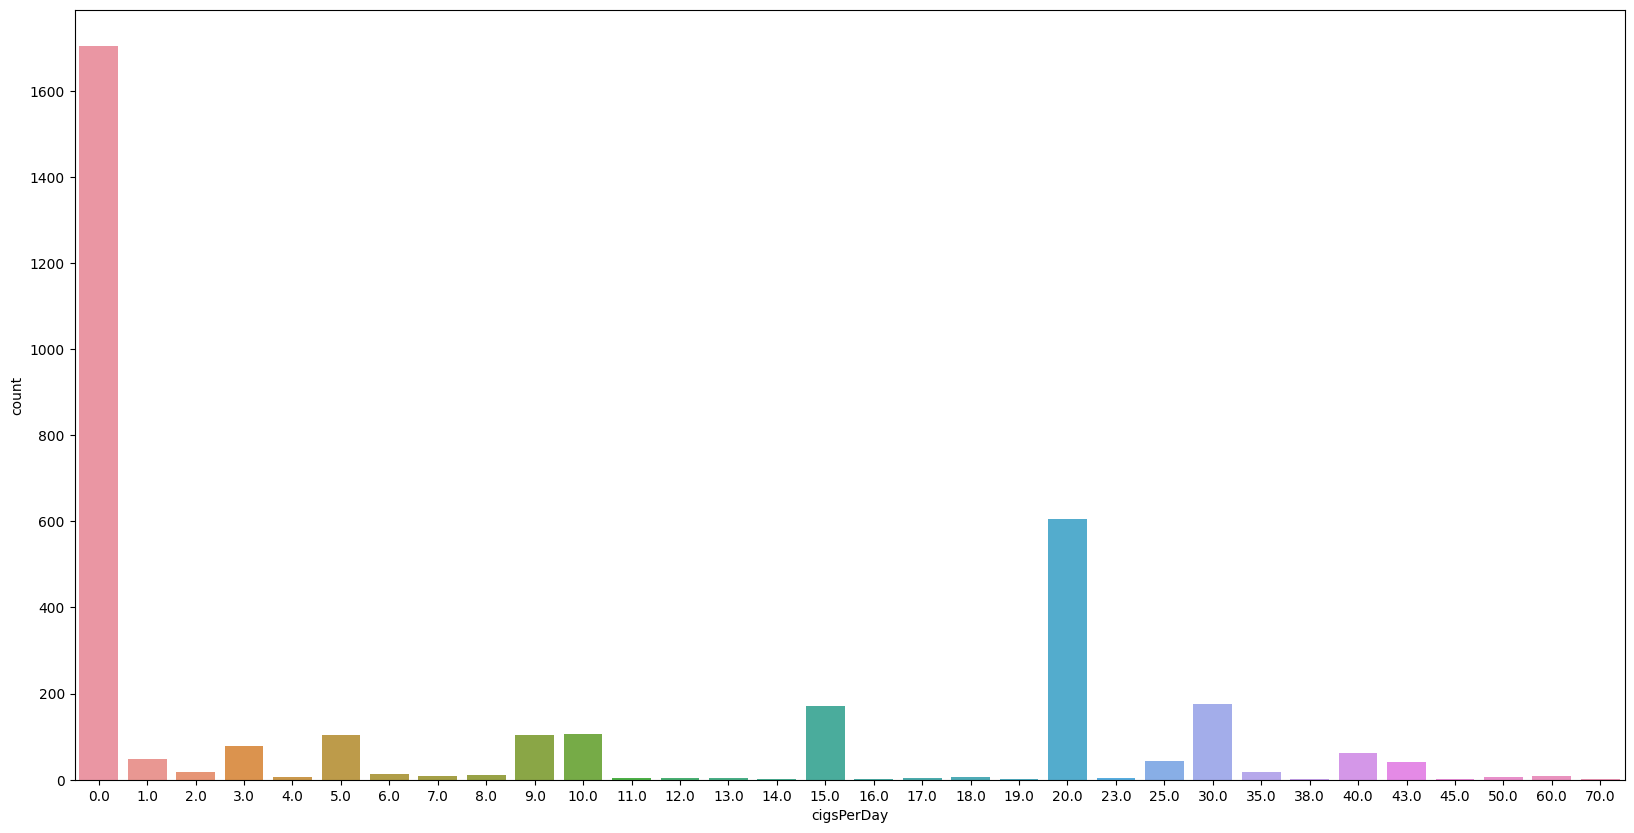

In [166]:
# checking the distribution of cigsPerDay
plt.figure(figsize=(20,10))
sns.countplot(x ='cigsPerDay', data = df)

<Axes: xlabel='TenYearCHD', ylabel='cigsPerDay'>

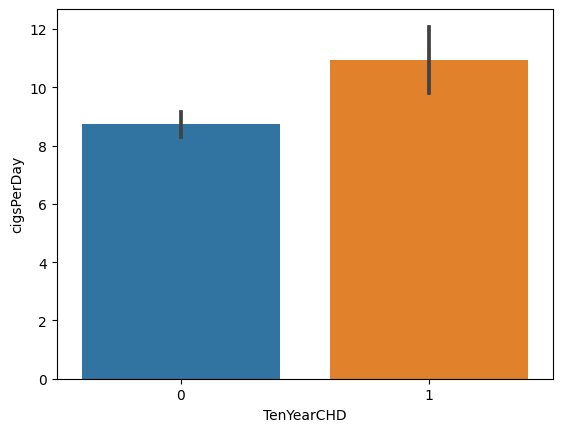

In [167]:
#plotting the bar plot to vizualize the data distribution of TenYearCHD and cigsPerDay
sns.barplot(x='TenYearCHD', y='cigsPerDay', data=df)			

Above Bar graph shows

* 0 - For person who is not showing cardiovascular risk

* 1 - For person who is showing cardiovascular risk

**From the above bar plot we can conclude that person who is showing cardiovascular risk prefers more cigrates in a day**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

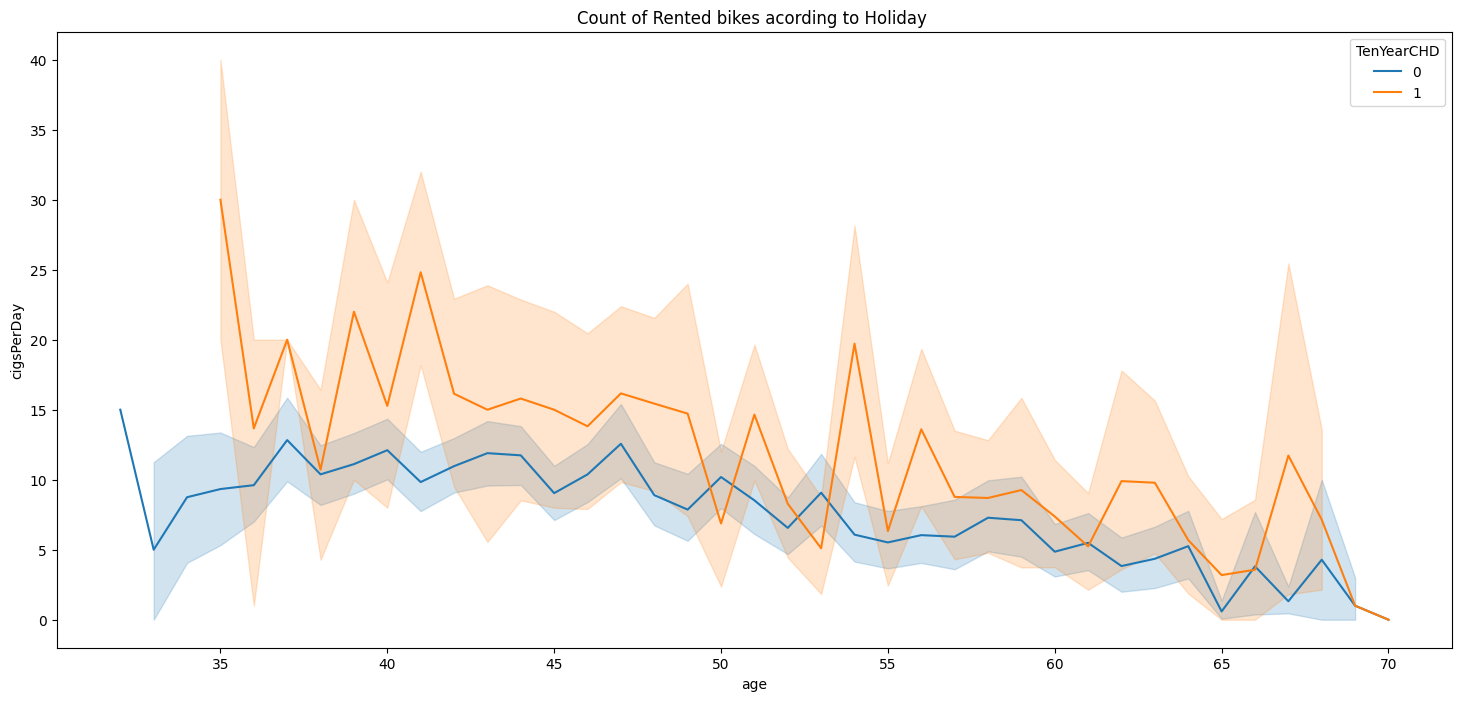

In [168]:
#plotting line plot for understanding distribution TenYearCHD over age and cigsPerDay
fig,ax=plt.subplots(figsize=(18,8))
sns.lineplot(data=df,x='age',y='cigsPerDay',hue='TenYearCHD',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

**From above graph we can say that as age and cigsperday are decresing risk of cardiovascular also decreasing**

In [169]:
# checking the distribution of sysBP
plt.figure(figsize=(200,100))
sns.countplot(x ='sysBP', data = df)

<Axes: xlabel='sysBP', ylabel='count'>

**for better visualisation double click on graph**

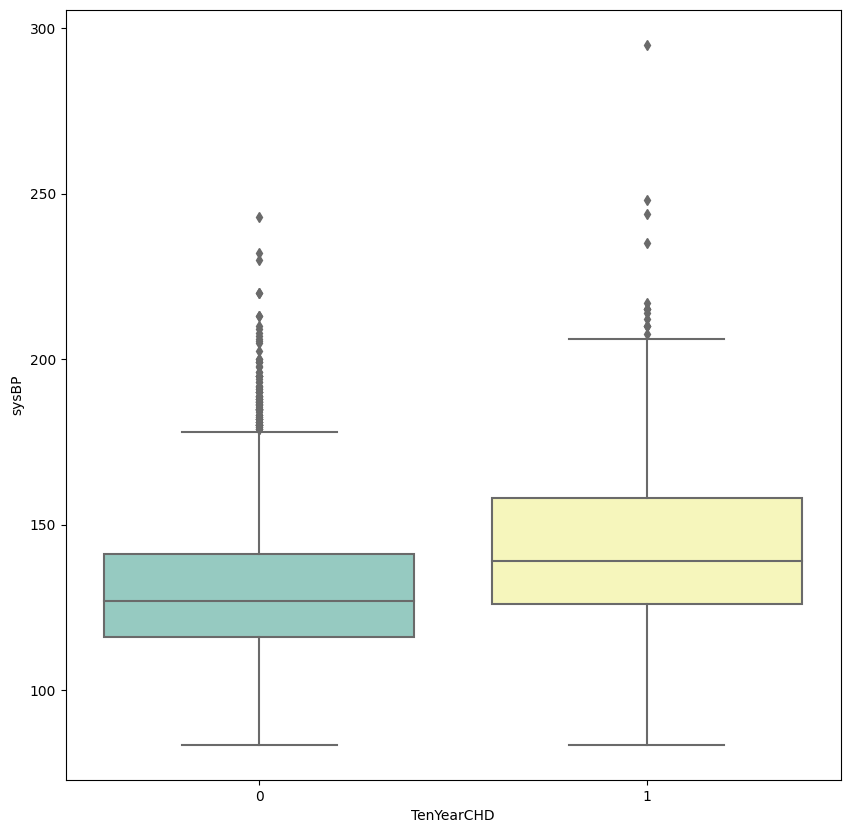

In [170]:
#plotting the box plot to vizualize the data distribution of TenYearCHD and sysBP
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="TenYearCHD", y="sysBP", data=df,palette="Set3")

**From the above box plot it is clear that peoples showing cardiovascular risk also showing sysBP appro 120-160**

In [171]:
# checking the distribution of diaBP
plt.figure(figsize=(200,100))
sns.countplot(x ='diaBP', data = df)

<Axes: xlabel='diaBP', ylabel='count'>

**for better visualisation double click on graph**

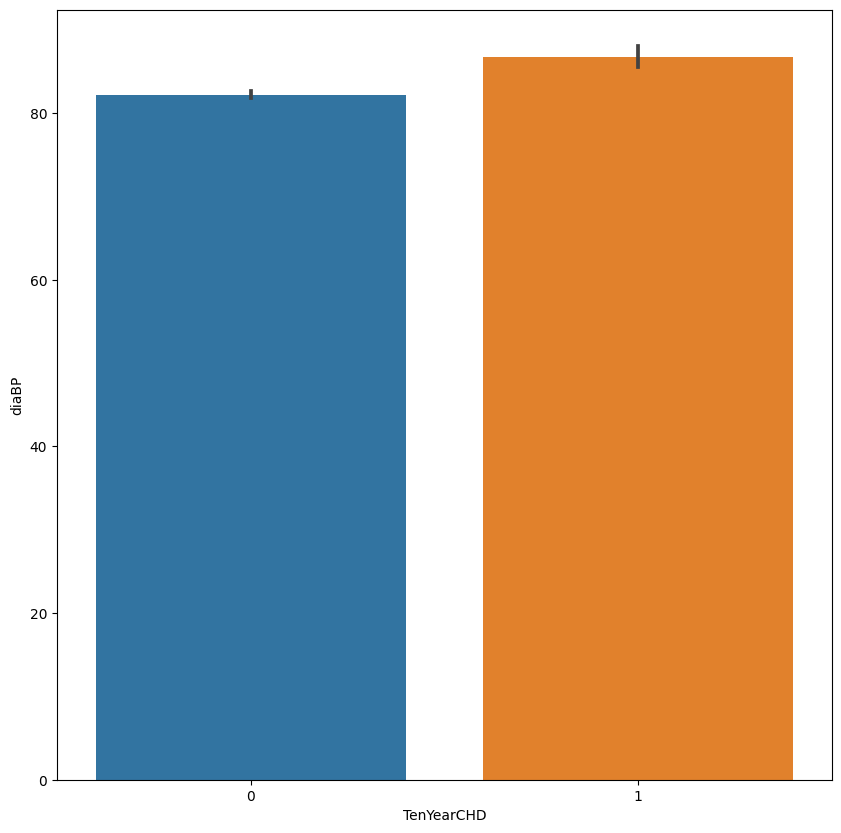

In [172]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.barplot(x="TenYearCHD", y="diaBP", data=df)

<Figure size 600x600 with 0 Axes>

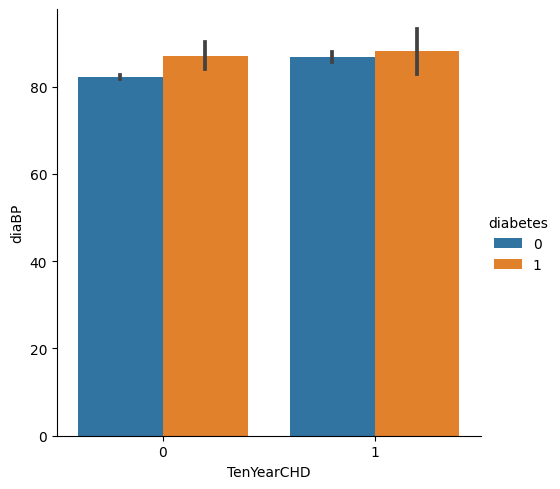

In [173]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(6,6))
sns.catplot(x="TenYearCHD", y="diaBP",
                hue="diabetes",
                data=df, kind="bar")

In [174]:
# checking the distribution of BMI
plt.figure(figsize=(200,100))
sns.countplot(x ='BMI', data = df)

<Axes: xlabel='BMI', ylabel='count'>

**for better visualisation double click on graph**

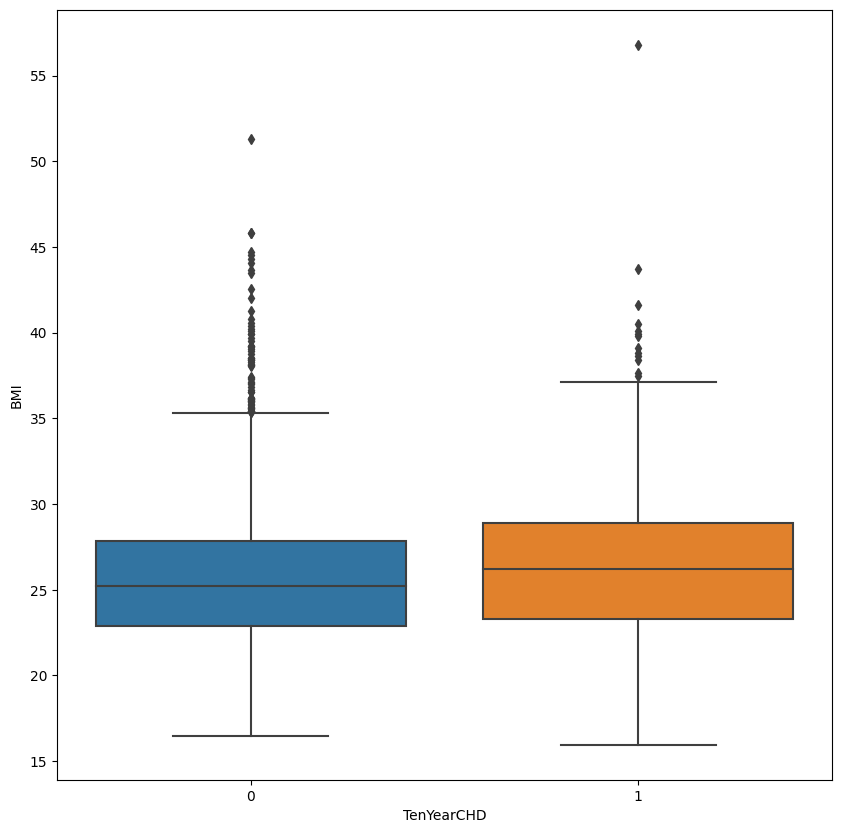

In [175]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="TenYearCHD", y="BMI", data=df)

From the above data analysis we can say that

* **BMI(Body Mass Index)of most of people is between approx 20-30**

In [176]:
# checking the distribution of heartRate
plt.figure(figsize=(200,100))
sns.countplot(x ='heartRate', data = df)

<Axes: xlabel='heartRate', ylabel='count'>

**for better visualisation double click on graph**

<Figure size 1000x1000 with 0 Axes>

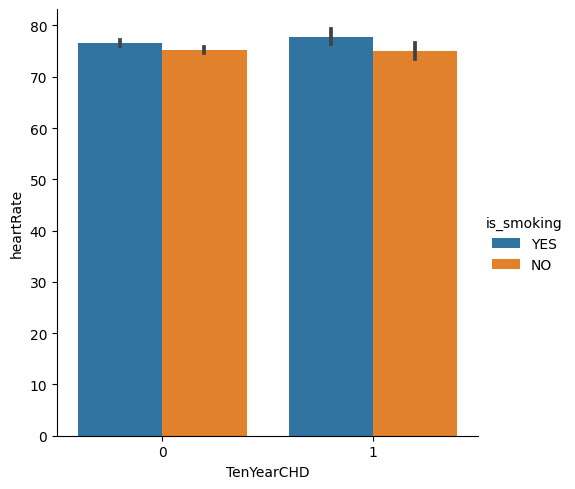

In [177]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
sns.catplot(x="TenYearCHD", y="heartRate",
                hue="is_smoking",
                data=df, kind="bar")

From the above data analysis we can say that

* **As we can see heartrate most of people is between approx 65-110**
* **heartrate of smokers shows more than non smoker**s 

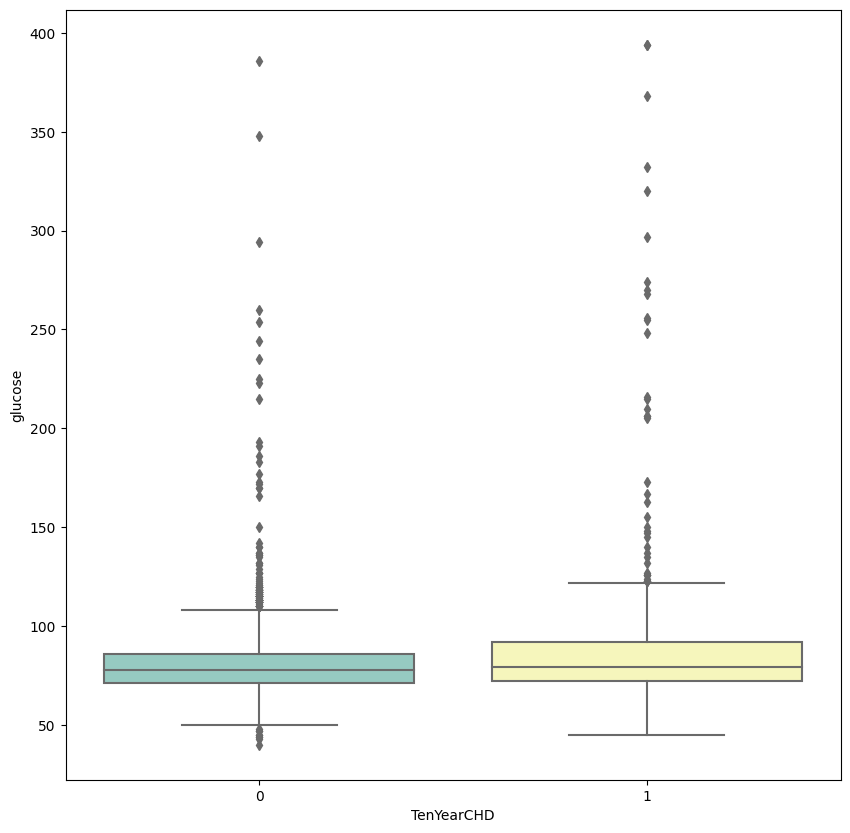

In [178]:
#plotting the box plot to vizualize the data distribution of TenYearCHD over glucose
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="TenYearCHD", y="glucose", data=df,palette="Set3")

From the above data analysis we can say that

* **As we can see glucose level of most of people is between 70-100**

##**Preprocessing**

###**Handling missing data**
Why do we need to handle missing values?

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first

*   Technique to handle missing data
1.   Remove records with missing data
2.   Replace with mean, median, mode
3.   Impute missing with machine learning algorithms
4.  Create seperate category for missing data

*   When replacing null values in a dataset, the choice between using the mean, median, or mode to replace the missing values depends on the characteristics of the data and the specific problem being addressed. Here are some general guidelines:
1.   Mean: The mean is a good choice when the data is normally distributed and has no extreme outliers. It is also useful when the missing values are numerical and continuous, and the goal is to maintain the central tendency of the data. However, if the distribution of the data is skewed, the mean may not be a good representative of the data.
2.   Median: The median is a good choice when the data has a skewed distribution or contains extreme outliers. It is also useful when the missing values are numerical and continuous, and the goal is to maintain the central tendency of the data. The median is less sensitive to extreme values than the mean, making it a better choice in some cases.
3.   Mode: The mode is a good choice when the data is categorical, and the missing values are discrete or nominal. The mode is the most frequently occurring value in a dataset, and it can be used to replace missing categorical data. However, if the data is continuous, the mode may not be a good representative of the data.

*  Missing data imputation using machine learning algorithms is a useful technique when the dataset has a significant proportion of missing values, and the goal is to obtain a more accurate predictive model. Here are some scenarios when imputation with machine learning can be beneficial:
1.  Missing values are not random: When missing values are not randomly distributed in the dataset, but rather have a pattern or structure, machine learning algorithms can be used to model this structure and impute the missing values based on the patterns observed in the data.
2.Large dataset: When the dataset is large, and manual imputation of missing values is not feasible, machine learning algorithms can be used to automate the process.
3.Predictive modeling: When the goal is to build a predictive model, imputing missing values using machine learning can improve the accuracy of the model by using the information from the other variables to predict the missing values.
4.Data quality: When the dataset contains errors or inconsistencies, imputing missing values using machine learning can help to identify and correct these errors.









In [179]:
# checking for missing values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [180]:
# Lets go and see the percentage of missing values
df.isnull().mean()*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

for this problem we replace missing values based on their feature category and based on the distribution of data

###**Handling outliers**
To detect outliers there are few techniques:
1.  z-score
2.  IQR
3.  Boxplot
4.  Scatter plot

###**Outlier detection on "education" column** 

In [181]:
# function to detect outliers using z-score
def outlier_detect_zscore(array):
  from scipy import stats
  z_score=stats.zscore(array)
  outlier_list = []
  threshold = 2
  for i in range(len(array)):
    if z_score[i]>threshold:
      outlier_list.append(array[i])
  print(f"Outliers detected using z-score : {outlier_list}")

def outlier_detect_IQR(array):
  outlier_list = []
  Q1 = np.quantile(array,0.25)
  Q3 = np.quantile(array,0.75)
  IQR = Q3-Q1
  lower_tail = Q1-1.5*IQR
  upper_tail = Q3+1.5*IQR
  for i in array:
    if i>upper_tail:
      outlier_list.append(i)
    if i<lower_tail:
      outlier_list.append(i)
  print(f"Outliers detected using IQR : {outlier_list}")

def outlier_detect_Boxplot(array):
  print(f"Outliers detected using Boxplot : \n{sns.boxplot(array)}")

Outliers detected using z-score : []
Outliers detected using IQR : []
Outliers detected using Boxplot : 
Axes(0.125,0.11;0.775x0.77)


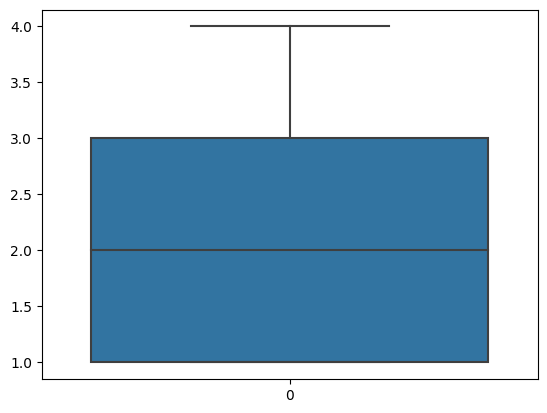

In [182]:
outlier_detect_zscore(df["education"])
outlier_detect_IQR(df["education"])
outlier_detect_Boxplot(df['education'])


In [183]:
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

so we see that "education" column don't have any outliers and in "education" column there are 4 categories so we replace null values with mode of column

In [184]:
mode_education = df['education'].mode()

In [185]:
# replaced null values with mode of education column
df['education'].fillna(mode_education[0],inplace = True)

In [186]:
df['education'].isna().sum()

0

###**Outlier detection on "cigsPerDay" column** 

Outliers detected using z-score : []
Outliers detected using IQR : []
Outliers detected using Boxplot : 
Axes(0.125,0.11;0.775x0.77)


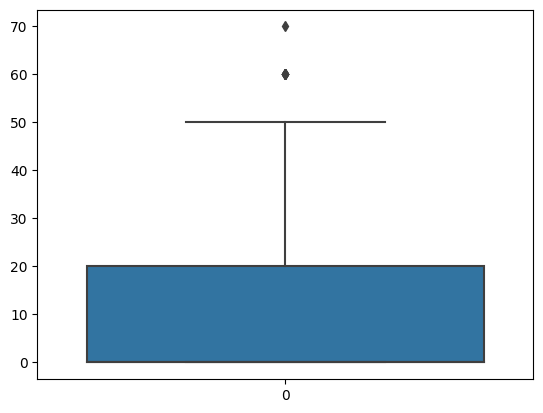

In [187]:
outlier_detect_zscore(df["cigsPerDay"])
outlier_detect_IQR(df["cigsPerDay"])
outlier_detect_Boxplot(df['cigsPerDay'])

we won't consider 70 or 60 cig per day because it's his choice and it is possible so we won't do anything for outlier

In [188]:
df["cigsPerDay"].value_counts()

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

In [189]:
mode_cigsPerDay = df['cigsPerDay'].mode()

In [190]:
# replaced null values with mode of cigsPerDay column
df['cigsPerDay'].fillna(mode_cigsPerDay[0],inplace = True)

In [191]:
df['cigsPerDay'].isna().sum()

0

replaced all null values with 0 because we won't able to give any predication on that

###**Outlier detection on "BPMeds" column** 

Outliers detected using z-score : []
Outliers detected using IQR : []
Outliers detected using Boxplot : 
Axes(0.125,0.11;0.775x0.77)


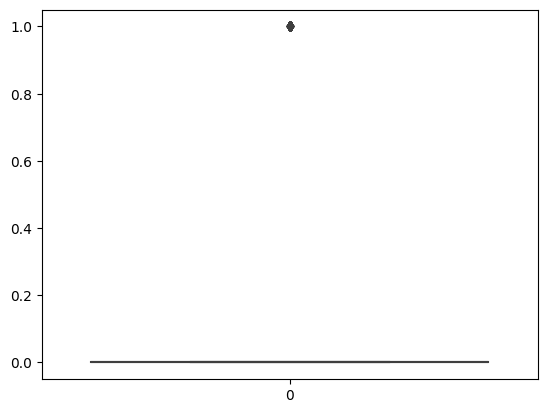

In [192]:
outlier_detect_zscore(df["BPMeds"])
outlier_detect_IQR(df["BPMeds"])
outlier_detect_Boxplot(df['BPMeds'])

In [193]:
df["BPMeds"].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

"BPMeds" this column also looks like categorical type of data so we replace all null values with mode of "BPMeds" column

In [194]:
mode_BPMeds = df['BPMeds'].mode()
# replaced null values with mode of cigsPerDay column
df['BPMeds'].fillna(mode_BPMeds[0],inplace = True)

In [195]:
df['BPMeds'].isna().sum()


0

###**Outlier detection on "totChol" column** 

Outliers detected using z-score : []
Outliers detected using IQR : []
Outliers detected using Boxplot : 
Axes(0.125,0.11;0.775x0.77)


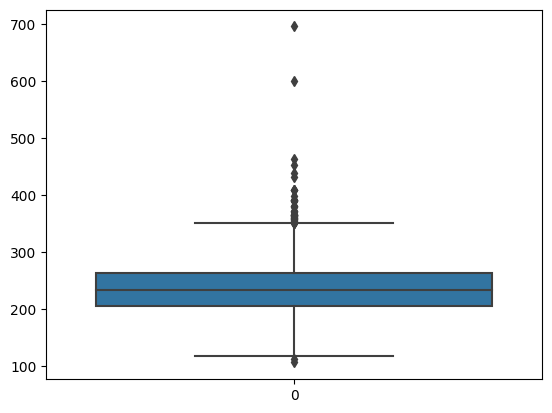

In [196]:
outlier_detect_zscore(df["totChol"])
outlier_detect_IQR(df["totChol"])
outlier_detect_Boxplot(df['totChol'])

In [197]:
df['totChol'].value_counts()

240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
137.0     1
113.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

In [198]:
df['totChol'].unique()

array([221., 212., 250., 233., 241., 272., 238., 295., 220., 326.,  nan,
       210., 213., 227., 188., 240., 257., 267., 232., 199., 175., 164.,
       226., 248., 245., 279., 273., 252., 198., 266., 216., 237., 193.,
       293., 180., 206., 215., 208., 262., 270., 292., 346., 202., 340.,
       334., 351., 235., 243., 196., 275., 186., 190., 268., 234., 264.,
       156., 260., 225., 183., 246., 174., 288., 254., 150., 211., 161.,
       274., 214., 195., 165., 302., 265., 251., 205., 209., 258., 222.,
       247., 189., 173., 281., 382., 181., 200., 244., 218., 261., 229.,
       291., 312., 170., 176., 290., 204., 239., 162., 314., 194., 271.,
       313., 305., 285., 169., 224., 201., 185., 307., 179., 280., 219.,
       391., 300., 253., 345., 278., 282., 255., 191., 439., 327., 287.,
       236., 332., 207., 230., 155., 335., 325., 223., 231., 197., 184.,
       310., 157., 228., 166., 303., 320., 163., 259., 178., 137., 217.,
       342., 328., 168., 167., 299., 304., 152., 28

no outliers are present in "totChol" column and it looks like a contineous and numeric data so there are two technique to fill null values for numeric data i.e 
1.  mean (use if data is normally distributed)
2.  median (use if data is skewed)

### **Techniques to find data is normally distributed or not:**
1.   Density plot (kdeplot)
2.   qq plot
3.   Shapiro test
4.   KS-test
5.   Normality test
6.   Skewness of residuel (after model training)

In [199]:
def Normal_distribution_checking_using_Density_plot(array):
  print(f"Normally distribution using Density plot (kdeplot) : \n{sns.kdeplot(array,fill=True)}")

def Normal_distribution_checking_using_qqplot(array):
  import scipy.stats as sts
  import statsmodels.api as sm
  print(f"Normally distribution using qqplot (qqplot) : \n{sm.qqplot(array)}")

def Normal_distribution_checking_using_shapiro_test(array):
  from scipy.stats import shapiro
  _,p_val = shapiro(array)
  if p_val>0.05:
    print('Using shapiro test : Data is normally distributed')
  else:
    print("Using shapiro test : Data is not normally distributed")

def Normal_distribution_checking_using_normaltest(array):
  from scipy.stats import normaltest
  _,p_val = normaltest(array)
  if p_val>0.05:
    print('Using normal test test : Data is normally distributed')
  else:
    print("Using normal test test : Data is not normally distributed")

def Normal_distribution_checking_using_KS_test(array):
  from scipy.stats import kstest
  _,p_val = kstest(array,'norm')
  if p_val>0.05:
    print('Using KS test test : Data is normally distributed')
  else:
    print("Using KS test test : Data is not normally distributed")

###**Normality testing on "totChol" column** 

Normally distribution using Density plot (kdeplot) : 
Axes(0.125,0.11;0.775x0.77)


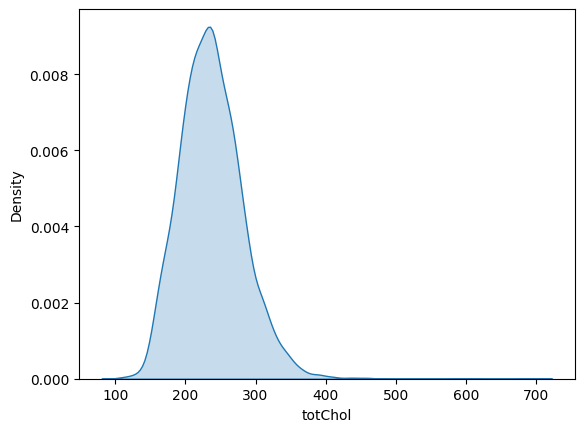

In [200]:
Normal_distribution_checking_using_Density_plot(df['totChol'])

Normally distribution using qqplot (qqplot) : 
Figure(640x480)


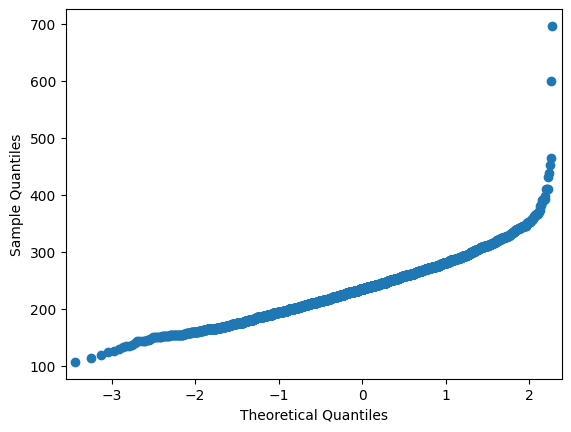

In [201]:
Normal_distribution_checking_using_qqplot(df['totChol'])

In [202]:
Normal_distribution_checking_using_shapiro_test(df['totChol'])
Normal_distribution_checking_using_normaltest(df['totChol'])
Normal_distribution_checking_using_KS_test(df['totChol'])

Using shapiro test : Data is normally distributed
Using normal test test : Data is not normally distributed
Using KS test test : Data is not normally distributed


from normally testing we see that data is not normally distributed, so we replace all null values of "totChol" column with median of "totChol" column.

In [203]:
median_totChol = df['totChol'].median()
# replaced null values with median of "totChol" column
df['totChol'].fillna(median_totChol,inplace = True)

In [204]:
df['totChol'].isna().sum()

0

###**Outlier detection on "BMI" column** 

Outliers detected using z-score : []
Outliers detected using IQR : []
Outliers detected using Boxplot : 
Axes(0.125,0.11;0.775x0.77)


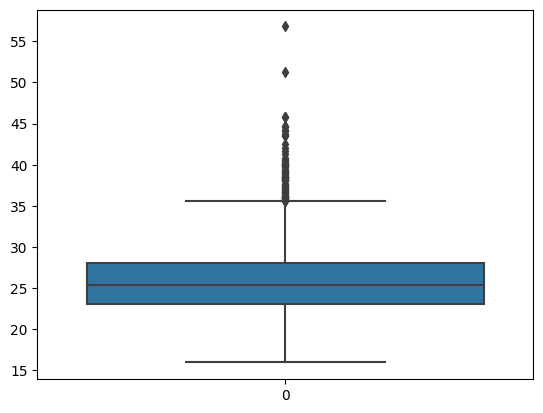

In [205]:
outlier_detect_zscore(df["BMI"])
outlier_detect_IQR(df["BMI"])
outlier_detect_Boxplot(df['BMI'])

In [206]:
df['BMI'].value_counts()

22.91    17
22.54    16
22.19    15
23.48    12
25.09    12
         ..
19.54     1
19.87     1
35.01     1
21.29     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

no outliers are present in "BMI" column and it looks like a contineous and numeric data so there are two technique to fill null values for numeric data i.e 
1.  mean (use if data is normally distributed)
2.  median (use if data is skewed)

###**Normality testing on "BMI" column** 

Normally distribution using Density plot (kdeplot) : 
Axes(0.125,0.11;0.775x0.77)


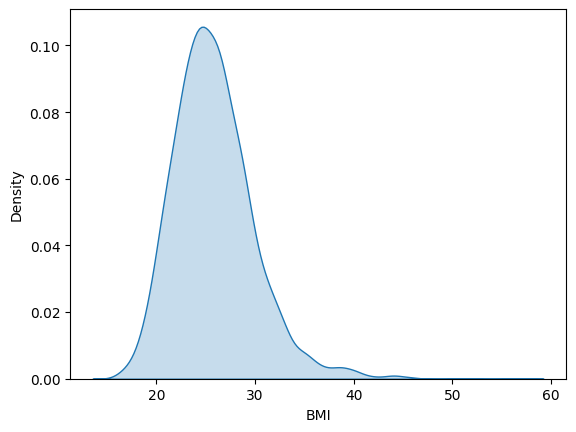

In [207]:
Normal_distribution_checking_using_Density_plot(df['BMI'])


Normally distribution using qqplot (qqplot) : 
Figure(640x480)


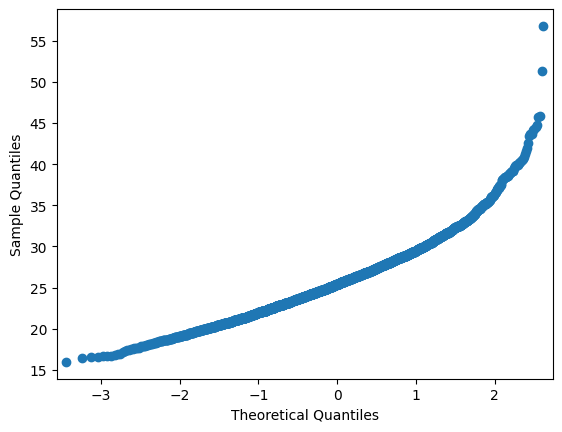

In [208]:
Normal_distribution_checking_using_qqplot(df['BMI'])


In [209]:
Normal_distribution_checking_using_shapiro_test(df['BMI'])
Normal_distribution_checking_using_normaltest(df['BMI'])
Normal_distribution_checking_using_KS_test(df['BMI'])

Using shapiro test : Data is normally distributed
Using normal test test : Data is not normally distributed
Using KS test test : Data is not normally distributed


from normally testing we see that data is not normally distributed, so we replace all null values of "BMI" column with median of "BMI" column.

In [210]:
median_BMI = df['BMI'].median()
# replaced null values with median of "BMI" column
df['BMI'].fillna(median_BMI,inplace = True)

In [211]:
df["BMI"].isna().sum()

0

**Whlile handling missing data there is one technique to deal with missing data which is "Remove record with missing data" but this technique is only used when there are very less amount missing data**

"heartRate" column have only one missing data so we are going to delete that row

In [212]:
df['heartRate'].isnull().sum()

1

In [213]:
df[df['heartRate'].isnull()] # row who have null value in "heartRate" column

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1388,1388,64,1.0,M,YES,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [214]:
df = df.dropna(subset=['heartRate']) # remove whole row

In [215]:
df['heartRate'].isnull().sum()


0

In [216]:
df.isna().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

###**Outlier detection on "glucose" column** 

Outliers detected using IQR : []
Outliers detected using Boxplot : 
Axes(0.125,0.11;0.775x0.77)


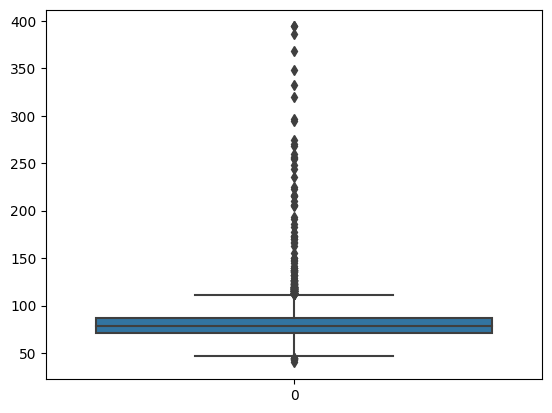

In [217]:
outlier_detect_IQR(df["glucose"])
outlier_detect_Boxplot(df['glucose'])

###**Normality testing on "glucose" column** 

In [220]:
Normal_distribution_checking_using_shapiro_test(df['glucose'])
Normal_distribution_checking_using_normaltest(df['glucose'])
Normal_distribution_checking_using_KS_test(df['glucose'])

Using shapiro test : Data is normally distributed
Using normal test test : Data is not normally distributed
Using KS test test : Data is not normally distributed


In [221]:
df['glucose'].median()

78.0

In [222]:
df['glucose'].mean()

82.0836304700162

In [223]:
df['glucose'].isna().sum()

304

In [224]:
median_glucose = df['glucose'].median()
# replaced null values with median of "glucose" column
df['glucose'].fillna(median_glucose,inplace = True)

<ipython-input-224-aebe6e6db519>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['glucose'].fillna(median_glucose,inplace = True)


In [225]:
df.isna().sum()


id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Now there is no null values present

**Removing duplicates**

Duplicate rows are the rows that have been registered more than one time so first we will check whether are present or not and if present then we will delete that rows

In [226]:
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


No duplicate rows are present

**Encode categorical data**

1.   One hot encodig (for non order data)
2.   Label encoding (for order data)



In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3389 non-null   int64  
 1   age              3389 non-null   int64  
 2   education        3389 non-null   float64
 3   sex              3389 non-null   object 
 4   is_smoking       3389 non-null   object 
 5   cigsPerDay       3389 non-null   float64
 6   BPMeds           3389 non-null   float64
 7   prevalentStroke  3389 non-null   int64  
 8   prevalentHyp     3389 non-null   int64  
 9   diabetes         3389 non-null   int64  
 10  totChol          3389 non-null   float64
 11  sysBP            3389 non-null   float64
 12  diaBP            3389 non-null   float64
 13  BMI              3389 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3389 non-null   float64
 16  TenYearCHD       3389 non-null   int64  
dtypes: float64(9),

In [228]:
df['sex'].value_counts() 

F    1923
M    1466
Name: sex, dtype: int64

In [229]:
df['is_smoking'].value_counts() 


NO     1703
YES    1686
Name: is_smoking, dtype: int64

**here we going to perform label encoding on columns sex, is_smoking**





In [230]:
df['sex'].replace({'F':0,'M':1},inplace=True)
df['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

<ipython-input-230-ddeae0d0ef94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'].replace({'F':0,'M':1},inplace=True)
<ipython-input-230-ddeae0d0ef94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_smoking'].replace({'NO':0,'YES':1},inplace=True)


**Here  we are converted**
*   male -1 and female -0
*   smoking yes - 1 and smoking no - 0

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3389 non-null   int64  
 1   age              3389 non-null   int64  
 2   education        3389 non-null   float64
 3   sex              3389 non-null   int64  
 4   is_smoking       3389 non-null   int64  
 5   cigsPerDay       3389 non-null   float64
 6   BPMeds           3389 non-null   float64
 7   prevalentStroke  3389 non-null   int64  
 8   prevalentHyp     3389 non-null   int64  
 9   diabetes         3389 non-null   int64  
 10  totChol          3389 non-null   float64
 11  sysBP            3389 non-null   float64
 12  diaBP            3389 non-null   float64
 13  BMI              3389 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3389 non-null   float64
 16  TenYearCHD       3389 non-null   int64  
dtypes: float64(9),

**Now our data is ready to pass model for predication**

**Split data**

In [232]:
from sklearn.model_selection import train_test_split
x = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

##**Logistic Regression Model training**

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [234]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Evaluation**

In [277]:
y_pred_test = logistic_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
logistic_regression_acc = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {logistic_regression_acc}")
print('*'*70)
y_pred_train = logistic_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[574   2]
 [ 94   8]]
Test data accuracy score : 0.8584070796460177
**********************************************************************
Train data confusion matrix : 
[[2292   11]
 [ 397   11]]
Train data accuracy score : 0.849502028771671


**Decision Tree model training**

In [236]:
from sklearn.tree import DecisionTreeClassifier

In [237]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [278]:
y_pred_test = dt_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Decision_tree_acc = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Decision_tree_acc}")
print('*'*70)
y_pred_train = dt_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[499  77]
 [ 74  28]]
Test data accuracy score : 0.7772861356932154
**********************************************************************
Train data confusion matrix : 
[[2303    0]
 [   0  408]]
Train data accuracy score : 1.0


<Axes: >

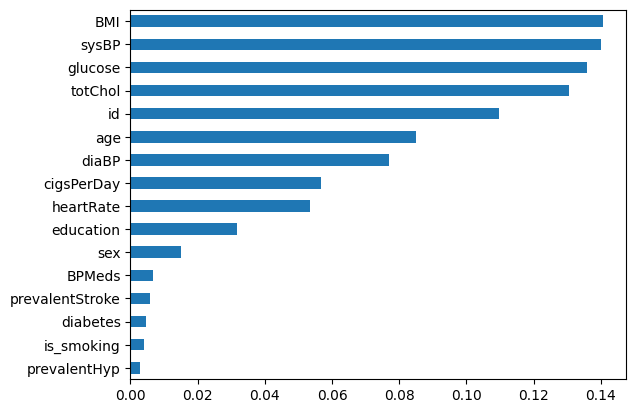

In [240]:
# to see feature importance of each column for model predication
array = dt_model.feature_importances_
s1 = pd.Series(array,index=x.columns)
s1.sort_values().plot(kind='barh')


as we are able to see "sex" , "BPMeds" , "is_smoking" , "prevalentHyp" , "prevalentStroke" , "diabetes" are not going to contribute more in model predication

**Decision Tree Hyperparameter tunning** 

In [241]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [244]:
hyperparameter = {'criterion':['gini','entropy'],
                  'max_depth':np.arange(3,8),
                  'min_samples_split':np.arange(2,20),
                  'min_samples_leaf':np.arange(2,15)}
rscv_dt = RandomizedSearchCV(dt_model,hyperparameter,cv=5)
rscv_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [246]:
rscv_dt.best_estimator_ # thus are the best hyperparameter

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=8,
                       min_samples_split=7)

In [247]:
dt_clf = rscv_dt.best_estimator_ 
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=8,
                       min_samples_split=7)

In [280]:
# calculating accuracy after hyperparameter tunning
y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Decision_tree_hyp_acc = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Decision_tree_hyp_acc}")
print('*'*70)
y_pred_train = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[574   2]
 [100   2]]
Test data accuracy score : 0.8495575221238938
**********************************************************************
Train data confusion matrix : 
[[2300    3]
 [ 400    8]]
Train data accuracy score : 0.8513463666543711


**Decision tree model building with pruining**

In [249]:
result = dt_model.cost_complexity_pruning_path(x_train,y_train) # Here we get dict of ccp-alpha and impuritie values

In [250]:
ccp_alpha_list = result['ccp_alphas'] # all ccp_alphas values stored

In [251]:
from numpy.random.mtrand import random
# for each ccp_alphas calculating training accuracy
for ccp_alpha in ccp_alpha_list:
  dt_pruining = DecisionTreeClassifier(random_state=10,ccp_alpha = ccp_alpha)
  dt_pruining.fit(x_train,y_train)
  train_accuracy = dt_pruining.score(x_train,y_train)
  print(train_accuracy)

1.0
0.99963113242346
0.9992622648469199
0.9985245296938399
0.9981556621172999
0.9977867945407599
0.9970490593876798
0.9970490593876798
0.9966801918111398
0.9966801918111398
0.9948358539284397
0.9944669863518997
0.9937292511988196
0.9933603836222796
0.9926226484691996
0.9922537808926596
0.9915160457395795
0.9915160457395795
0.9907783105864995
0.9907783105864995
0.9907783105864995
0.9904094430099595
0.9904094430099595
0.9893028402803393
0.9889339727037993
0.9881962375507193
0.9878273699741793
0.9874585023976392
0.9870896348210992
0.9870896348210992
0.9867207672445591
0.9863518996680192
0.9859830320914792
0.9852452969383991
0.9845075617853191
0.983769826632239
0.983400959055699
0.982663223902619
0.982663223902619
0.982294356326079
0.9808188860199188
0.9808188860199188
0.9800811508668388
0.9800811508668388
0.9793434157137587
0.9774990778310586
0.9774990778310586
0.9749170047952785
0.9730726669125784
0.9701217263002582
0.9701217263002582
0.9701217263002582
0.9701217263002582
0.9701217263002

In [252]:
train_acc_list = []
test_acc_list = []
for ccp_alpha in ccp_alpha_list:
  dt_pruining = DecisionTreeClassifier(random_state=10,ccp_alpha = ccp_alpha)
  dt_pruining.fit(x_train,y_train)
  train_acc_list.append(dt_pruining.score(x_train,y_train))
  test_acc_list.append(dt_pruining.score(x_test,y_test))

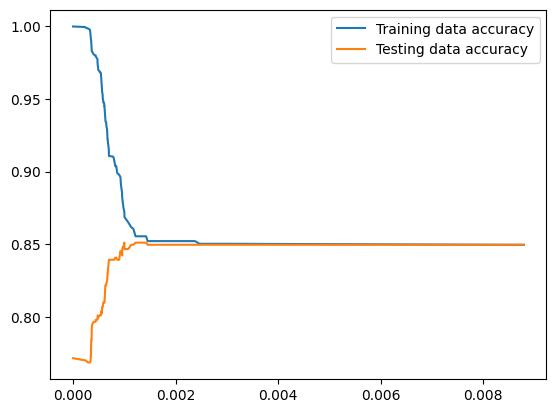

In [253]:
# plot graph to find best ccp_alpha value
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_acc_list,label = "Training data accuracy")
ax.plot(ccp_alpha_list,test_acc_list,label = "Testing data accuracy")
ax.legend()

In [254]:
# find max test accuracy
np.where(test_acc_list == np.max(test_acc_list))

(array([130, 135, 136]),)

In [255]:
test_acc_list[127]

0.8480825958702065

In [256]:
test_acc_list[132]

0.8466076696165191

In [257]:
test_acc_list[133]

0.8495575221238938

we are getting same accuracy at index [127, 132, 133]

In [258]:
ccp_alpha_list[127] # now we use this value and train our model and see whether accuracy is increased or not

0.0009750640696460557

In [259]:
dt_pruining = DecisionTreeClassifier(random_state=10,ccp_alpha =ccp_alpha_list[127] )
dt_pruining.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0009750640696460557, random_state=10)

In [281]:
# calculating accuracy after pruining
y_pred_test = dt_pruining.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Decision_tree_pruining_acc = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Decision_tree_pruining_acc}")
print('*'*70)
y_pred_train = dt_pruining.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[561  15]
 [ 88  14]]
Test data accuracy score : 0.8480825958702065
**********************************************************************
Train data confusion matrix : 
[[2269   34]
 [ 299  109]]
Train data accuracy score : 0.8771670970121727


**Random forest model training**

In [261]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [282]:
# calculating accuracy of random forest model without hyperparameters tunning
y_pred_test = rf_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Random_forest_acc = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Random_forest_acc}")
print('*'*70)
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[574   2]
 [ 95   7]]
Test data accuracy score : 0.8569321533923304
**********************************************************************
Train data confusion matrix : 
[[2303    0]
 [   0  408]]
Train data accuracy score : 1.0


**Random forest hyperparameter tunning**

In [264]:
hyperparameters = {'n_estimators':np.arange(10,200),
                   'criteria':['gini','entropy'],
                   'max_depth':np.arange(3,8),
                   'min_sample_split':np.arange(4,20),
                   'min_sample_leaf':np.arange(3,10),
                   'max_features':[7],
                   'random_state':[11],
                   'obb_score':[True]}
rscv_rf = RandomizedSearchCV(rf_model,hyperparameter,cv=5)
rscv_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [265]:
rscv_rf.best_estimator_ # thus are the best hyperparameters we get after tunning the model

RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=14)

In [266]:
rf_hyp = rscv_rf.best_estimator_  # all best hyperparameters are stored in variable
rf_hyp.fit(x_train,y_train) # train model with new parameters

RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=14)

In [283]:
# calculating accuracy of random forest model after hyperparameters tunning
y_pred_test = rf_hyp.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Random_forest_hyp_acc = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Random_forest_hyp_acc}")
print('*'*70)
y_pred_train = rf_hyp.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[576   0]
 [ 99   3]]
Test data accuracy score : 0.8539823008849557
**********************************************************************
Train data confusion matrix : 
[[2303    0]
 [ 375   33]]
Train data accuracy score : 0.8616746587974917


<Axes: >

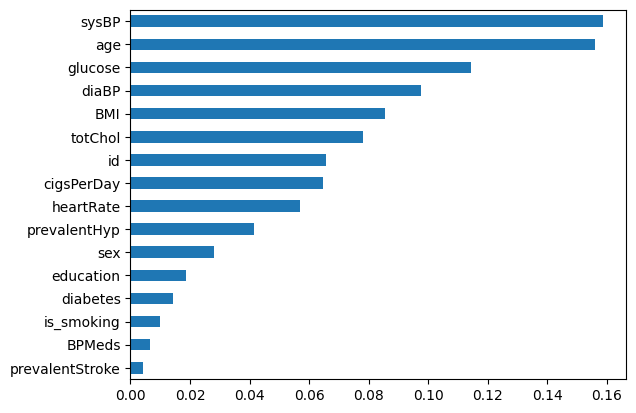

In [268]:
s1 = pd.Series(rf_hyp.feature_importances_,index=x.columns)
s1.sort_values().plot(kind='barh')

as we are able to see "BPMeds" , "is_smoking" , "prevalentStroke" are not going to contribute more in model predication

**Adaboost**

In [269]:
from sklearn.ensemble import AdaBoostClassifier

In [270]:
adb_model = AdaBoostClassifier()
adb_model.fit(x_train,y_train)

AdaBoostClassifier()

In [284]:
# calculating accuracy of Adaboost model evaluation
y_pred_test = adb_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Adaboost_acc = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Adaboost_acc}")
print('*'*70)
y_pred_train = adb_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[566  10]
 [ 95   7]]
Test data accuracy score : 0.8451327433628318
**********************************************************************
Train data confusion matrix : 
[[2275   28]
 [ 349   59]]
Train data accuracy score : 0.8609369236444117


**Adaboost hyperparameter tunning**

In [272]:
adb_clf = AdaBoostClassifier(random_state=10)
hyperparameters = {'n_estimators':np.arange(10,100),
                   'learning_rate':np.arange(0,2,0.001)}
rscv_adb = RandomizedSearchCV(adb_clf,hyperparameters,cv=5)
rscv_adb.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=10),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [273]:
adb_hyp = rscv_adb.best_estimator_
adb_hyp.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.992, n_estimators=10, random_state=10)

In [285]:
# calculating accuracy of Adaboost after hyperparameter tunning model evaluation
y_pred_test = adb_hyp.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Test data confusion matrix : \n{cnf_matrix}")
Adaboost_hyp_acc = accuracy_score(y_test,y_pred_test)
print(f"Test data accuracy score : {Adaboost_hyp_acc}")
print('*'*70)
y_pred_train = adb_hyp.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Train data confusion matrix : \n{cnf_matrix}")
acc = accuracy_score(y_train,y_pred_train)
print(f"Train data accuracy score : {acc}")

Test data confusion matrix : 
[[571   5]
 [ 95   7]]
Test data accuracy score : 0.8525073746312685
**********************************************************************
Train data confusion matrix : 
[[2286   17]
 [ 368   40]]
Train data accuracy score : 0.8579859830320915


<Axes: >

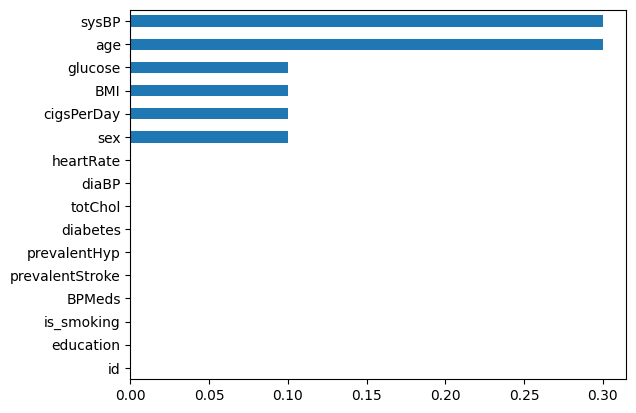

In [275]:
s1 = pd.Series(adb_hyp.feature_importances_,index=x.columns)
s1.sort_values().plot(kind='barh')

as we are able to see "id" , "sex" , "heartrate", "diaBP", "is_smoking" are not going to contribute more in model predication

In [291]:
data = {'Model name': ['logistic Regression', 'Decision tree', 'Decision tree hyperparameter', 'Decision tree pruining','Random forest','random forest hyperparameter','adaboost','Adaboost hyperparameter'],
        'Accuracy': [logistic_regression_acc,Decision_tree_acc,Decision_tree_hyp_acc,Decision_tree_pruining_acc,Random_forest_acc,Random_forest_hyp_acc,Adaboost_acc,Adaboost_hyp_acc]}

df = pd.DataFrame(data,columns=['Model name','Accuracy'])

print(df.sort_values(by='Accuracy'))


                     Model name  Accuracy
1                 Decision tree  0.777286
6                      adaboost  0.845133
3        Decision tree pruining  0.848083
2  Decision tree hyperparameter  0.849558
7       Adaboost hyperparameter  0.852507
5  random forest hyperparameter  0.853982
4                 Random forest  0.856932
0           logistic Regression  0.858407


**As we are able to see logistic regression model give good accuracy

**Creating test array to test how our model is perform**

In [293]:
test_array = np.zeros(len(x.columns)) #this array we pass to our model
# test array length is equal to independent column
label_encoded_data = {'sex':{'M':1,'F':0},'is_smoking':{'NO':0,'YES':1}} # now whatever user give input it is converted in numeric form

In [295]:
label_encoded_data['sex']['M'] # testing

1

In [304]:
id = 1	
age = 36	
education = 4.0
sex = "M"	
is_smoking = 'NO'	
cigsPerDay = 0
BPMeds = 0.0
prevalentStroke	= 0
prevalentHyp	= 1
diabetes	= 0
totChol	= 221.0
sysBP	= 168
diaBP	= 98.0
BMI	= 29.77
heartRate	= 72
glucose	= 75

In [305]:
#thus steps are used to get input from user and convert it in numeric form
test_array[0] = id
test_array[1] = age
test_array[2] = education
test_array[3] = label_encoded_data['sex'][sex]
test_array[4] = label_encoded_data['is_smoking'][is_smoking]
test_array[5] = cigsPerDay
test_array[6] = BPMeds
test_array[7] = prevalentStroke
test_array[8] = prevalentHyp
test_array[9] = diabetes
test_array[10] = totChol
test_array[11] = sysBP
test_array[12] = diaBP
test_array[13] = BMI
test_array[14] = heartRate
test_array[15] = glucose


In [306]:
logistic_model.predict([test_array])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

##**Create Pickle file**

In [309]:
import pickle
with open('logistic_model.pkl','wb') as f:
  pickle.dump(logistic_model,f)

In [310]:
# thus label encoded data required to our model for building API
project_data = {'sex':{'M':1,'F':0},'is_smoking':{'NO':0,'YES':1},'columns':list(x.columns)}

In [312]:
import json
# we required thus data in json form
with open('project_data.json','w') as f:
  json.dump(project_data,f)

**Now everything is done just go and build API**